# Algoritmos de Machine learning (Algoritmos de regresion)

## Regresion Lineal

*Bueno, empezamos con las aplicaciones de todo esto que hemos aprendido, en el mundo de ML existen varios tipos de algoritmos para la creación de modelos de aprendizaje, durante este grupo-Curso hablaremos y trabajaremos las de `Regresion` y `clasificacion`, en este caso empezaremos con las de regresión*

*La regresión lineal es un tipo de modelo basado en la regresión, que permite la estimación de algo en función de otra variable, esta puede tener solo una variable o más, sin embargo, cambia un poco su creación cuando es para múltiple, miraremos un poco la parte teórica y luego la práctica de esta*

Este tema se ve en Álgebra lineal y es una de las aplicaciones de las matrices que se ve empezando la asignatura, es muy utilizada y fácil de implementar,

En pocas palabras, esta intenta crear una recta pendiente que más se ajuste a un conjunto de datos en un plano, haciendo que esta se alinee lo más acercado de su diagonal y la proyección sea la más indicada.

La regresión lineal `nos devuelve un modelo matematico`

Su ecuación es de la forma:
 $$y=mx+b$$

  Donde

  -Y es la ecuacion del modelo

  -m es la pendiente la recta

  -x es la variable independiente

  -b es la constante o más llamado en este mundo del ML como el sesgo

La fórmula que se usa en el álgebra lineal dado un conjunto de datos es 

$$RL=(X^{T}X)^{-1}X^{T}Y$$

- X es una fila del conjunto de datos convertido en matriz
  
- Y es una fila del conjunto de datos convertido en matriz

Cuando hacemos todas esas operaciones nos genera 2 valores siendo la pendiente y el sesgo, solamente es rellenar los datos y listo

Tambien existe una forma usando el metodo de minimos cuadrados.

![MinimosCuadrados](../Media/formulaMatematica.png)


*Si lo se , asusta un poco , lo importante es saber que existe y que es una forma de hacerlo a mano , esto ya no se hace , para algo esta la programacion y la informatica.*

Terminemos con las operaciones matematicas mejor y ya vamos a programar.

Existe el siguiente conjunto de datos , posee 2 columnas Intensidad del Tráfico (Autos)	y Tiempo Atascado (minutos) , queremos crear un modelo matematico que nos permita mostrar `cuantos minutos de atasco habran con cierta cantidad de autos`

In [69]:
import pandas as pd # para leer el archivo

import matplotlib.pyplot as plt 

from sklearn.linear_model import LinearRegression # Importamos el modelo

route=r'../Media/Trafico_tiempo.xlsx' #Ruta del archivo

dataset=pd.read_excel(route)



In [70]:
dataset

,Intensidad del Tráfico (Autos),Tiempo Atascado (minutos)
0,50,47.46
1,70,63.60
2,90,92.13
3,110,96.10
4,130,129.53
5,150,159.93
6,170,184.25
7,190,186.52
8,210,219.98
9,230,222.99


In [71]:
# Algunos datos importantes de ldataset

print(dataset.columns.values)

print(dataset.shape) #dimensiones

print(dataset.size) #Cuantos datos hay

print(dataset.value_counts()) # Valores de cada tipo hay

['Intensidad del Tráfico (Autos)' 'Tiempo Atascado (minutos)']
(30, 2)
60
Intensidad del Tráfico (Autos)  Tiempo Atascado (minutos)
50                              47.46                        1
70                              63.60                        1
90                              92.13                        1
110                             96.10                        1
130                             129.53                       1
150                             159.93                       1
170                             184.25                       1
190                             186.52                       1
210                             219.98                       1
230                             222.99                       1
250                             246.10                       1
270                             272.60                       1
290                             308.48                       1
310                             315.32           

In [72]:
dataset = dataset.rename(columns={'Intensidad del Tráfico (Autos)': 'intensidad','Tiempo Atascado (minutos)':'minutos'}) # Cambiamos los nombres para trabajar mejor

#Recibe un solo diccionario con las columnas a cambiar

x=dataset[['intensidad']] #Separamos los datos en x y y

y=dataset[['minutos']]



dataset

,intensidad,minutos
0,50,47.46
1,70,63.60
2,90,92.13
3,110,96.10
4,130,129.53
5,150,159.93
6,170,184.25
7,190,186.52
8,210,219.98
9,230,222.99


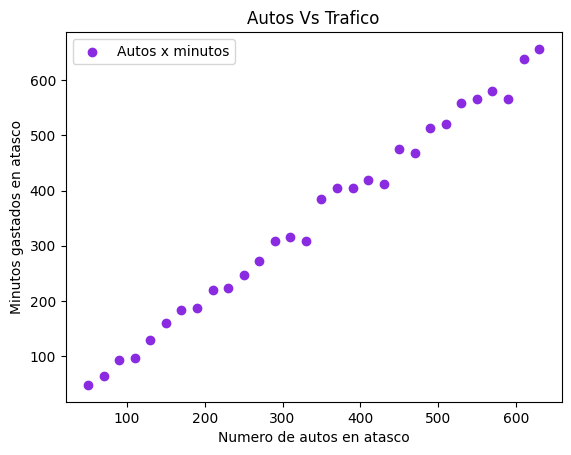

In [73]:
#podemos ver un poco como esta la distribucion de estos datos y su dispercion

fig, ax=plt.subplots()

ax.scatter(x,y,label="Autos x minutos",color="blueviolet")
ax.set_xlabel("Numero de autos en atasco")
ax.set_ylabel("Minutos gastados en atasco")
ax.legend()
ax.set_title("Autos Vs Trafico")
plt.show()


In [74]:
# Podemos crear el modelo usando lo siguiente

model=LinearRegression()


In [75]:
model.fit(x,y) #Alimentamos el modelo con sus datos basicos de x,y

LinearRegression()

In [76]:
# Podemos obtener los componentes del modelo para crear una ecuacion predictiva

m=model.intercept_ #Hace referencia a nuestra pendiente tambien el intercepto 

b=model.coef_ #El sesgo o error conocido tambien como el coeficiente

import numpy as np


#Crear una funcion para poder predecir el valor a proyectar  METODO 1

def predecir_Regresion(x):
    
    x_array = np.array(x).reshape(1, -1)
    ecuacion = model.predict(x_array).astype(float)

    return f'La proyeccion con un{x} es de aproximadamente {np.round(ecuacion,2)}'

print(predecir_Regresion(482)) #Recordar que esto entrega el dato en un arreglo de numpy y no un float , aunque puede arreglarse

La proyeccion con un482 es de aproximadamente [[494.26]]


c:\Users\Cristian\Documents\DocumentacionGrupoML_DS\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [77]:
# Tambien la manera simple pero es repetir codigo muchas veces en ocasiones especiales
model.predict([[482]]) 

c:\Users\Cristian\Documents\DocumentacionGrupoML_DS\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[494.26295766]])

## Miremos como se veria los datos con la regresion y sin esta

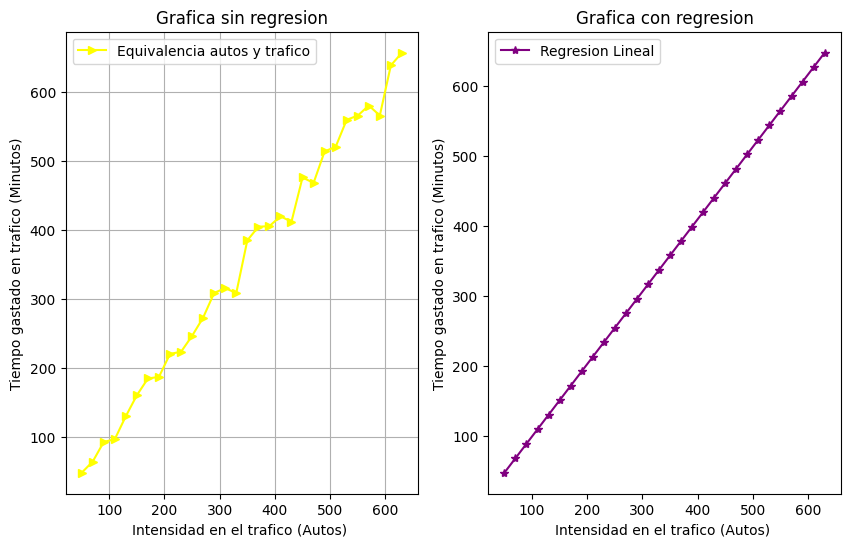

In [81]:
plt.figure(figsize=(10,6))

#Datos sin regresion

plt.subplot(1, 2, 1) 

plt.plot(x,y,color="yellow",marker=">",label="Equivalencia autos y trafico")

plt.xlabel("Intensidad en el trafico (Autos) ")

plt.ylabel("Tiempo gastado en trafico (Minutos)")

plt.legend()

plt.title('Grafica sin regresion')

plt.grid(True)


#Regresion lineal

plt.subplot(1,2,2)

plt.plot(x,model.predict(x),color="purple",marker="*",label="Regresion Lineal") #Se introduce variable independiente para obtener la depediente (la opuesta)

plt.xlabel("Intensidad en el trafico (Autos) ")

plt.ylabel("Tiempo gastado en trafico (Minutos)")

plt.title('Grafica con regresion')


plt.legend()

plt.grid(False)


plt.show()


## Tipos de regresiones lineas

In [ ]:
# TODO PONER EL RESTO DE REGRESIONES Y EJEMPLOS